In [1]:
pip install librosa

In [2]:
pip install matplotlib

In [3]:
!python -m ensurepip --upgrade
!python -m pip install --upgrade pip

/usr/bin/python3: No module named ensurepip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [4]:
pip install tensorflow

In [5]:
pip install numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [10]:
random_file_name = "/content/drive/MyDrive/Colab Notebooks/Music Genre Classification/blues.00000.wav"

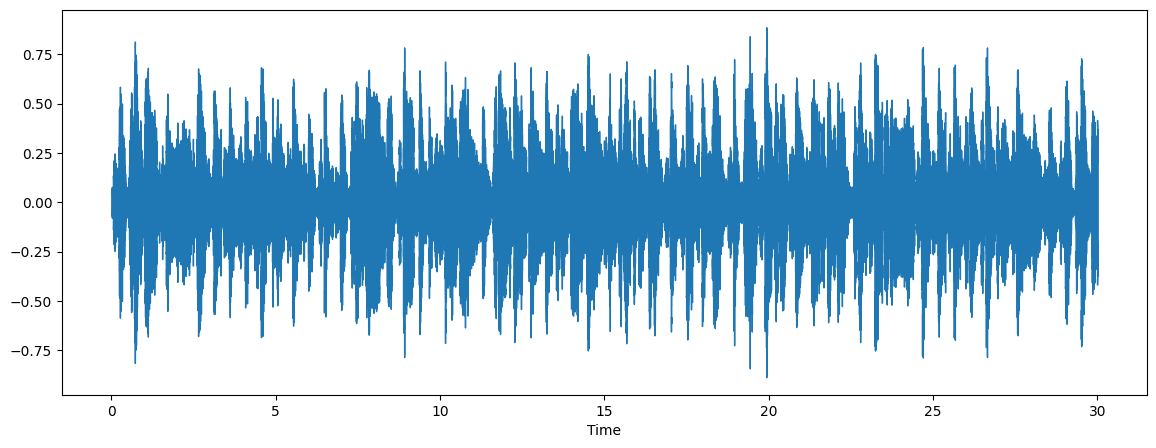

In [11]:
y,sr = librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [12]:
y.shape

(1323588,)

In [13]:
from IPython.display import Audio
Audio(data=y,rate=sr)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
y

array([ 0.00734921,  0.01335782,  0.01657648, ..., -0.07293833,
       -0.06308185, -0.03151622], dtype=float32)

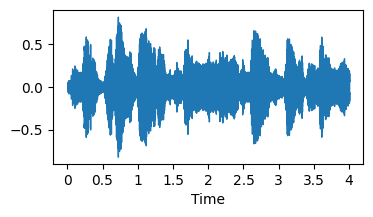

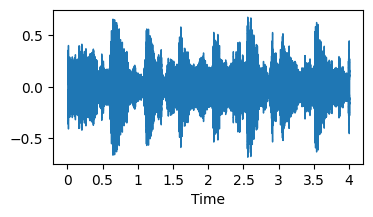

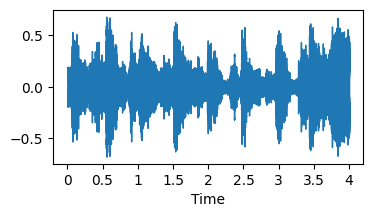

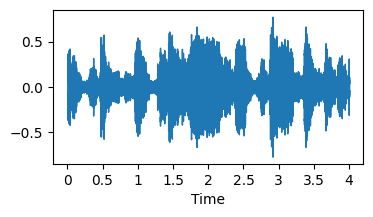

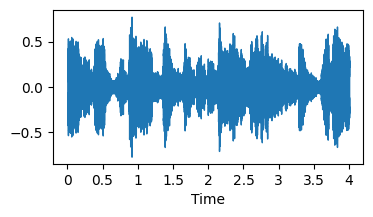

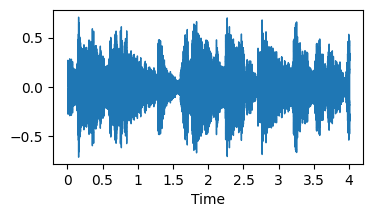

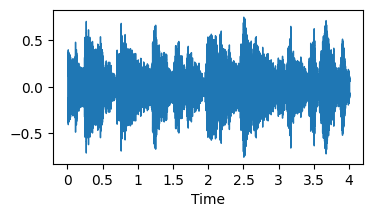

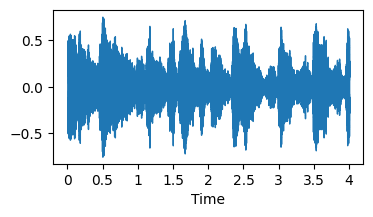

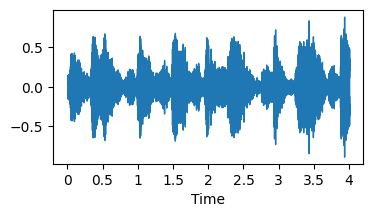

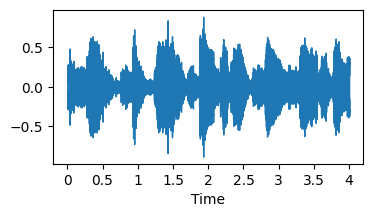

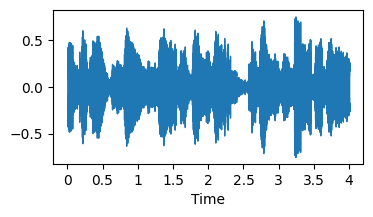

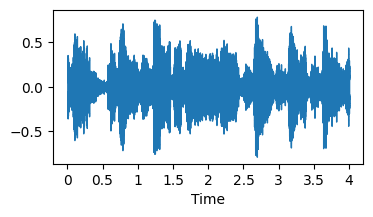

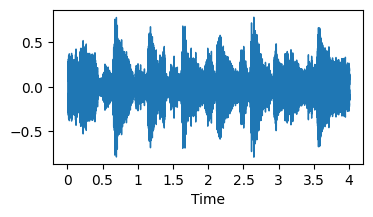

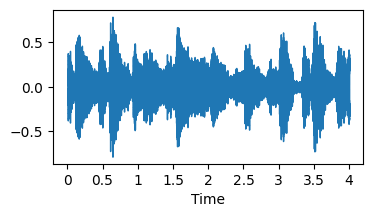

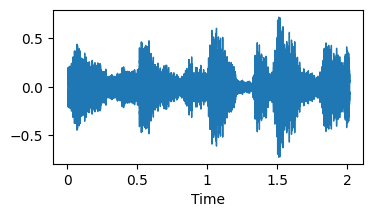

In [15]:
audio_path = "/content/drive/MyDrive/Colab Notebooks/Music Genre Classification/blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)
chunk_duration = 4
overlap_duration = 2
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
for i in range(num_chunks):
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

## Melspectrogram Visualization

In [16]:
def plot_melespectrogram(y,sr):
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()


In [17]:
random_file_name = "/content/drive/MyDrive/Colab Notebooks/Music Genre Classification/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

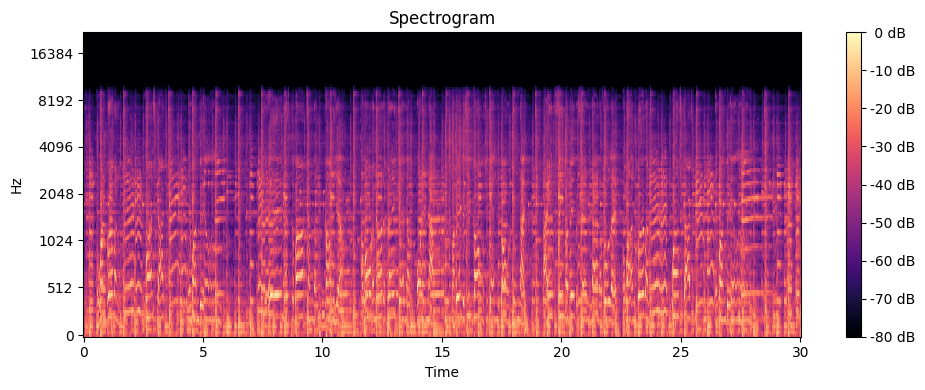

In [18]:
plot_melespectrogram(y,sr)

In [19]:
def plot_melspectrogram_chunks(y,sr):
    chunk_duration = 4
    overlap_duration = 2
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1

    for i in range(num_chunks):
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        chunk = y[start:end]
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [20]:
random_file_name = "/content/drive/MyDrive/Colab Notebooks/Music Genre Classification/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

In [21]:
plot_melspectrogram_chunks(y,sr)

Output hidden; open in https://colab.research.google.com to view.

In [22]:
128*345

44160

In [23]:
210*210

44100

In [24]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/Music Genre Classification/Data/genres_original"
classes = ['blues', 'classical','country','disco','hiphop','metal','pop','reggae','rock']

In [25]:
from tensorflow.image import resize
import os
import numpy as np
import librosa

def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--", class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                try:


                    audio_data, sample_rate = librosa.load(file_path, sr=None, mono=True)
                    chunk_duration = 4
                    overlap_duration = 2
                    chunk_samples = chunk_duration * sample_rate
                    overlap_samples = overlap_duration * sample_rate

                    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                    for i in range(num_chunks):
                        start = int(i * (chunk_samples - overlap_samples))
                        end = int(start + chunk_samples)
                        chunk = audio_data[start:end]
                        mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                        mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                        data.append(mel_spectrogram)
                        labels.append(i_class)

                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")
    return np.array(data), np.array(labels)

In [26]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [27]:
data.shape

(13490, 150, 150, 1)

In [28]:
labels.shape

(13490,)

In [29]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes))
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
labels.shape

(13490, 9)

In [31]:
from tensorflow.keras.optimizers import Adam

## Splitting of Dataset into Training and Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

# Building Model

In [33]:
model = tf.keras.models.Sequential()

In [34]:
X_train[0].shape

(150, 150, 1)

In [35]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [37]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [38]:
model.add(Dropout(0.3))

In [39]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [40]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [41]:
model.add(Dropout(0.3))

Fully connected Layers

In [42]:
model.add(Flatten())

In [43]:
model.add(Dense(units=1200,activation='relu'))

In [44]:
model.add(Dropout(0.45))

In [45]:
model.add(Dense(units=len(classes),activation='softmax'))

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │        10,809 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,181,257 (27.39 MB)

 Trainable params: 7,181,257 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
training_history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 57s 123ms/step - accuracy: 0.2054 - loss: 2.0622 - val_accuracy: 0.4010 - val_loss: 1.6113
Epoch 2/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.4462 - loss: 1.5254 - val_accuracy: 0.5775 - val_loss: 1.1841
Epoch 3/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.5961 - loss: 1.1310 - val_accuracy: 0.6557 - val_loss: 0.9599
Epoch 4/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.6876 - loss: 0.9271 - val_accuracy: 0.7087 - val_loss: 0.8247
Epoch 5/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.7259 - loss: 0.7918 - val_accuracy: 0.7380 - val_loss: 0.7422
Epoch 6/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.7655 - loss: 0.6832 - val_accuracy: 0.7569 - val_loss: 0.7467
Epoch 7/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.7953 - loss: 0.5898 - val_accuracy: 0.7947 - val_loss: 0.6128
Epoch 8/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.8333 - loss: 0.4901 -

In [49]:
model.save("Trained_model.h5")

In [50]:
training_history.history

{'accuracy': [0.26936620473861694,
  0.49481096863746643,
  0.6174944639205933,
  0.6941252946853638,
  0.7319310307502747,
  0.768346905708313,
  0.8005930185317993,
  0.8306152820587158,
  0.8572090268135071,
  0.8801890015602112,
  0.8988139629364014,
  0.9114158749580383,
  0.9240177869796753,
  0.9349518418312073,
  0.9453298449516296,
  0.9458858370780945,
  0.9481096863746643,
  0.9646960496902466,
  0.9636768102645874,
  0.9671978950500488,
  0.9705337285995483,
  0.972294270992279,
  0.9747034907341003,
  0.9779466390609741,
  0.9807264804840088,
  0.9786879420280457,
  0.9796145558357239,
  0.9814677834510803,
  0.9812824130058289,
  0.981653094291687],
 'loss': [1.9197803735733032,
  1.4109362363815308,
  1.0861976146697998,
  0.9073370695114136,
  0.7753846645355225,
  0.67520672082901,
  0.5777003169059753,
  0.4927968680858612,
  0.4199678897857666,
  0.35291069746017456,
  0.3013562560081482,
  0.256240576505661,
  0.2227264940738678,
  0.19662153720855713,
  0.162580475

In [51]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [52]:
X_train

array([[[[2.16458030e-02],
         [2.84843985e-02],
         [2.62774471e-02],
         ...,
         [2.74668317e-02],
         [3.07752490e-02],
         [5.14375381e-02]],

        [[1.67185385e-02],
         [1.06357420e-02],
         [8.69153719e-03],
         ...,
         [1.13777015e-02],
         [1.41660422e-02],
         [2.79521514e-02]],

        [[4.21777703e-02],
         [4.53175083e-02],
         [3.84430662e-02],
         ...,
         [2.65855435e-02],
         [4.31285277e-02],
         [3.49732302e-02]],

        ...,

        [[7.70925726e-06],
         [2.74178933e-06],
         [1.18034097e-06],
         ...,
         [1.22775953e-06],
         [1.66842699e-06],
         [4.83745271e-06]],

        [[8.15748172e-06],
         [2.62513367e-06],
         [1.26639100e-06],
         ...,
         [1.05716424e-06],
         [1.49623361e-06],
         [4.94950382e-06]],

        [[7.25242489e-06],
         [2.58070941e-06],
         [1.37585539e-06],
         ...,
 

In [53]:
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │        10,809 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,181,259 (27.39 MB)

 Trainable params: 7,181,257 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [54]:
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [55]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Model Evaluation - I

In [56]:
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

338/338 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9962 - loss: 0.0140


In [57]:
train_loss,train_accuracy

(0.0135033018887043, 0.9967568516731262)

In [58]:
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9123 - loss: 0.3188


In [59]:
val_loss,val_accuracy

(0.3261524736881256, 0.9128984212875366)

In [60]:
training_history_data['val_loss']

[1.6112794876098633,
 1.1840885877609253,
 0.9598830938339233,
 0.8246810436248779,
 0.7422108054161072,
 0.7467321753501892,
 0.6128345727920532,
 0.6390343308448792,
 0.51084303855896,
 0.48048874735832214,
 0.5790150761604309,
 0.40301671624183655,
 0.4008376896381378,
 0.3722406029701233,
 0.3725348711013794,
 0.4135068953037262,
 0.3416416645050049,
 0.42959722876548767,
 0.4226675033569336,
 0.35417187213897705,
 0.3953026831150055,
 0.3711663782596588,
 0.4002147614955902,
 0.33506491780281067,
 0.35857558250427246,
 0.43262574076652527,
 0.36290690302848816,
 0.3906400203704834,
 0.38638755679130554,
 0.3261524736881256]

## Accuracy and Loss Visualization

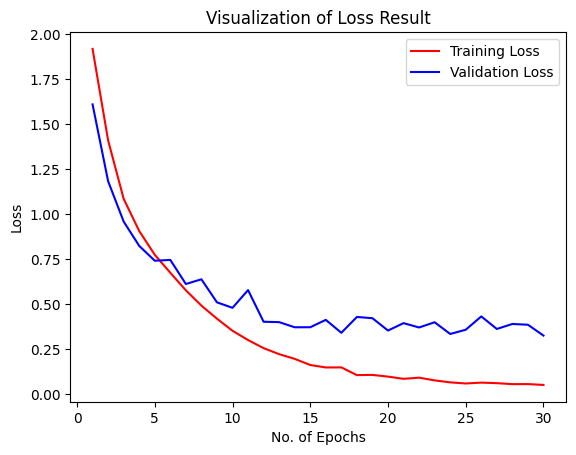

In [61]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

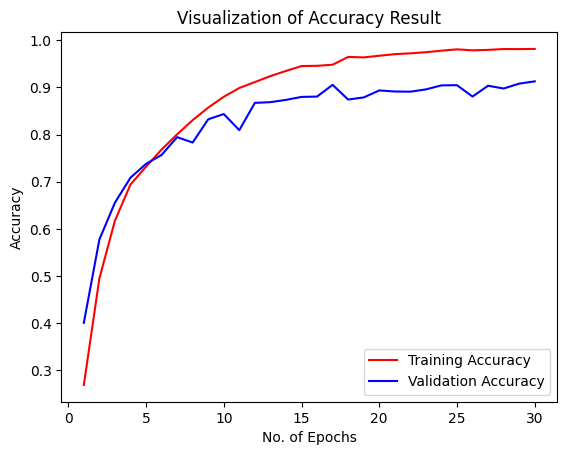

In [62]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Precision,Recall,Confusion Matrix - Model Evaluation-II

In [63]:
X_test.shape

(2698, 150, 150, 1)

In [64]:
y_pred = model.predict(X_test)
y_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


array([[1.5967929e-06, 1.2495996e-09, 9.9819142e-01, ..., 1.8010892e-03,
        2.9558314e-06, 2.9535349e-06],
       [9.9999619e-01, 3.0023184e-14, 2.2026522e-06, ..., 4.0842438e-12,
        1.6903747e-11, 5.0953557e-09],
       [2.1696517e-03, 1.3558827e-09, 8.3641672e-01, ..., 2.6612248e-05,
        9.6000835e-02, 6.5204993e-02],
       ...,
       [2.0027026e-10, 6.0244115e-10, 1.0572209e-08, ..., 9.9626368e-01,
        2.9526395e-04, 1.4830295e-07],
       [2.4256046e-09, 2.7871249e-12, 9.9999988e-01, ..., 1.2813215e-12,
        3.6802297e-10, 1.6855711e-07],
       [6.5104402e-09, 1.1785876e-11, 1.4363922e-09, ..., 3.3248106e-11,
        5.0068483e-10, 4.2682266e-04]], dtype=float32)

In [65]:
y_pred.shape

(2698, 9)

In [66]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([2, 0, 2, ..., 6, 2, 5])

In [67]:
Y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
Y_test.shape

(2698, 9)

In [69]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([2, 0, 2, ..., 6, 2, 5])

In [70]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'metal',
 'pop',
 'reggae',
 'rock']

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(true_categories, predicted_categories)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(true_categories, predicted_categories, target_names=classes))


              precision    recall  f1-score   support

       blues       0.96      0.86      0.91       316
   classical       0.96      0.98      0.97       291
     country       0.86      0.90      0.88       326
       disco       0.89      0.94      0.92       289
      hiphop       0.95      0.95      0.95       295
       metal       0.93      0.96      0.95       298
         pop       0.92      0.92      0.92       318
      reggae       0.91      0.89      0.90       273
        rock       0.84      0.82      0.83       292

    accuracy                           0.91      2698
   macro avg       0.91      0.91      0.91      2698
weighted avg       0.91      0.91      0.91      2698



In [76]:
cm = confusion_matrix(true_categories, predicted_categories)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[273   1  12   4   1   3   1   4  17]
 [  1 285   3   0   0   0   2   0   0]
 [  7   4 292   3   0   0   5   5  10]
 [  0   2   2 272   2   1   0   8   2]
 [  1   0   0   5 279   3   3   2   2]
 [  0   0   2   0   1 287   0   0   8]
 [  1   2   9   4   4   2 291   2   3]
 [  2   1   5   4   4   1   9 244   3]
 [  0   3  15  13   2  12   5   2 240]]


In [79]:
import pandas as pd
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_categories, predicted_categories)

# Create labeled DataFrame
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

print("Confusion Matrix (rows = true labels, columns = predicted labels):")
print(cm_df)


Confusion Matrix (rows = true labels, columns = predicted labels):
           blues  classical  country  disco  hiphop  metal  pop  reggae  rock
blues        273          1       12      4       1      3    1       4    17
classical      1        285        3      0       0      0    2       0     0
country        7          4      292      3       0      0    5       5    10
disco          0          2        2    272       2      1    0       8     2
hiphop         1          0        0      5     279      3    3       2     2
metal          0          0        2      0       1    287    0       0     8
pop            1          2        9      4       4      2  291       2     3
reggae         2          1        5      4       4      1    9     244     3
rock           0          3       15     13       2     12    5       2   240


## Confusion Matrix Visualization

In [73]:
pip install seaborn

In [74]:
pip install pandas

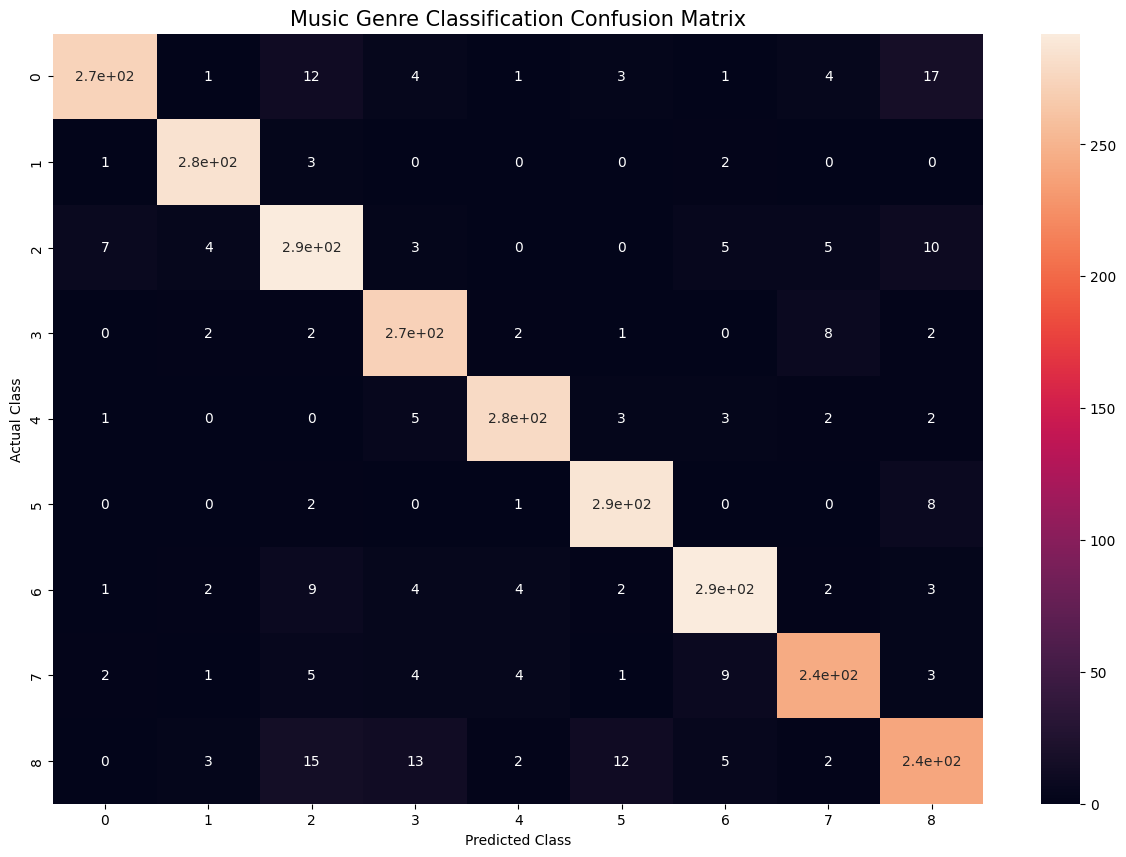

In [75]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()